# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tools.eval_measures import rmse

In [2]:
plt.rcParams['figure.figsize'] = (21,12)

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [3]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [4]:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [5]:
sensor.isnull().sum()
#there is no missing data :)

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [6]:
print(f'The sensor data has {sensor.shape[0]} rows, and {sensor.shape[1]} columns')

The sensor data has 1751 rows, and 12 columns


In [7]:
sensor.columns

Index(['attitude.roll', 'attitude.pitch', 'attitude.yaw', 'gravity.x',
       'gravity.y', 'gravity.z', 'rotationRate.x', 'rotationRate.y',
       'rotationRate.z', 'userAcceleration.x', 'userAcceleration.y',
       'userAcceleration.z'],
      dtype='object')

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [8]:
#Making sure our index is a time series with a known frequency, so the data needs to be equally spaced.

daterange = pd.date_range(start='1/1/2018 00:00:00',end='1/1/2018 00:29:10',periods=sensor.shape[0])
daterange

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq=None)

Assign the time series index to the dataframe's index.

In [9]:
# Your code here:
sensor.index = daterange

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

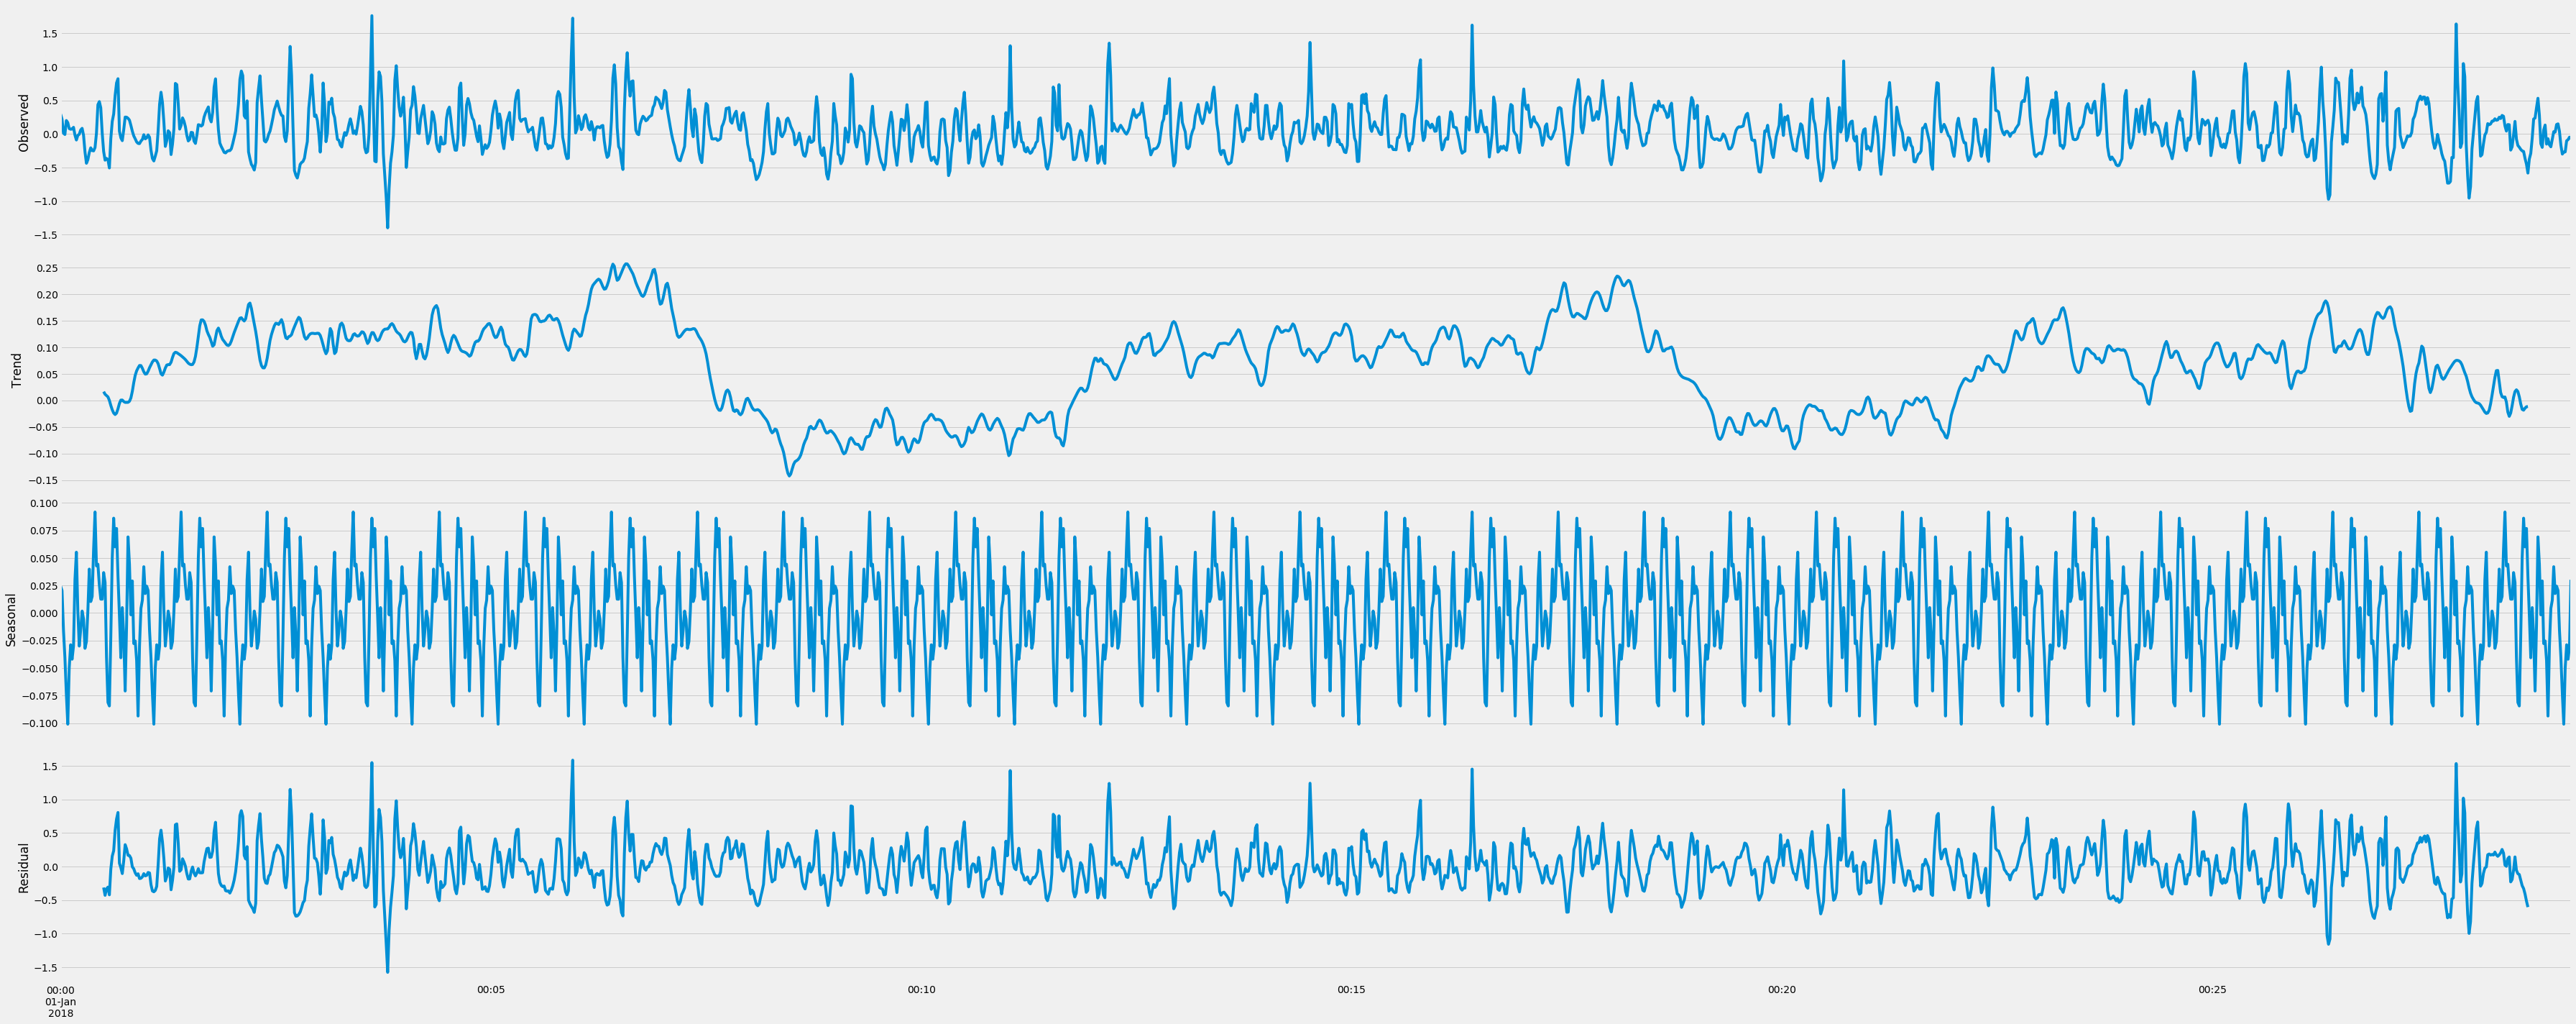

In [26]:
# Ploting the decomposed time series using moving averages
plt.rcParams['figure.figsize'] = (50,20)
plt.style.use('fivethirtyeight')

response = sm.tsa.seasonal_decompose(sensor['userAcceleration.x'], freq=60)
response.plot();

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

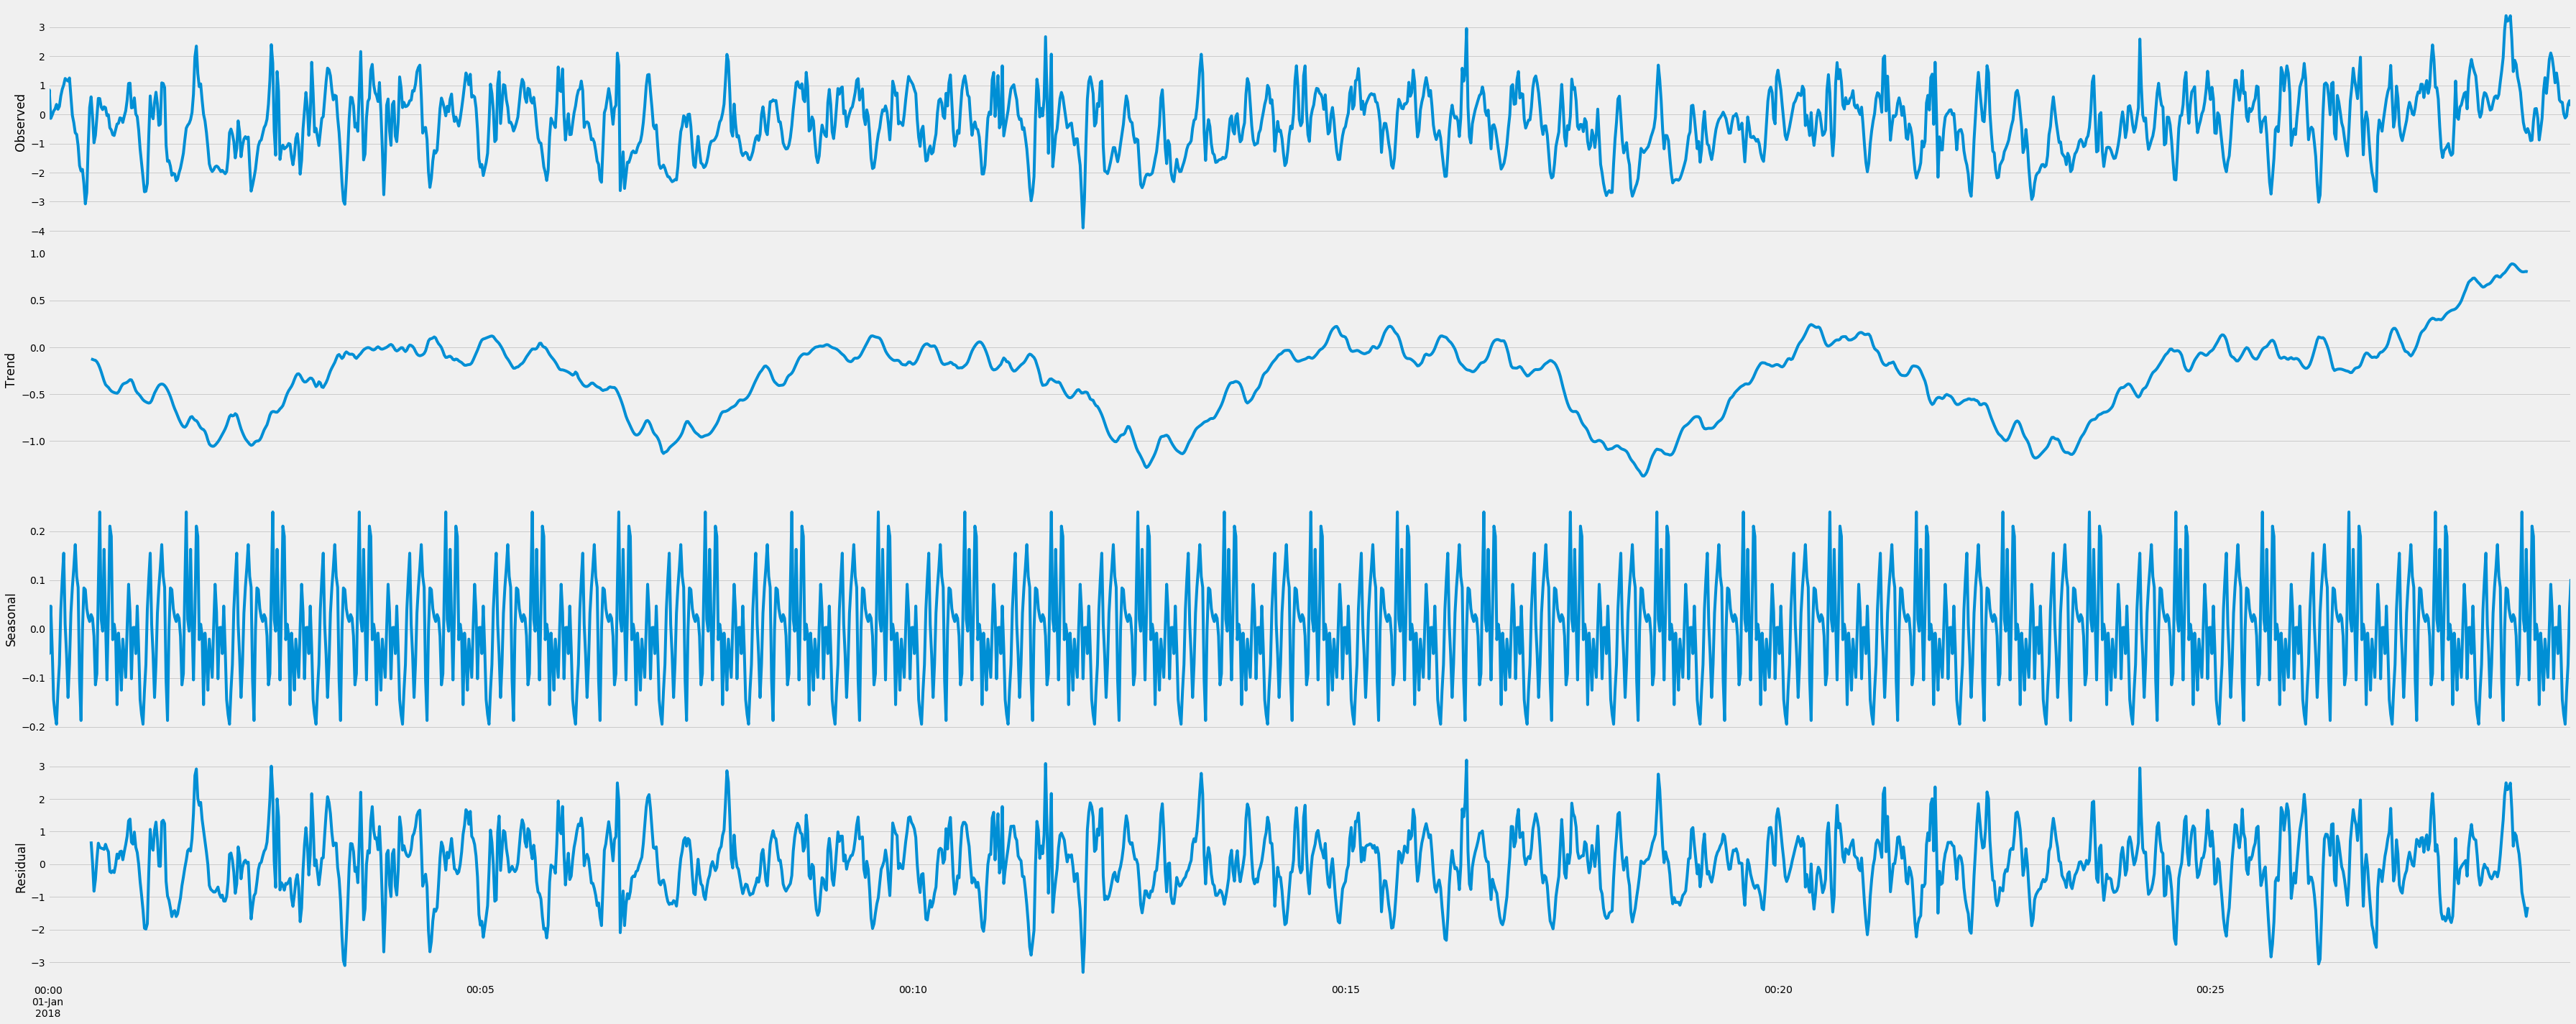

In [33]:
response2 = sm.tsa.seasonal_decompose(sensor['rotationRate.x'],freq=60)
response2.plot();

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


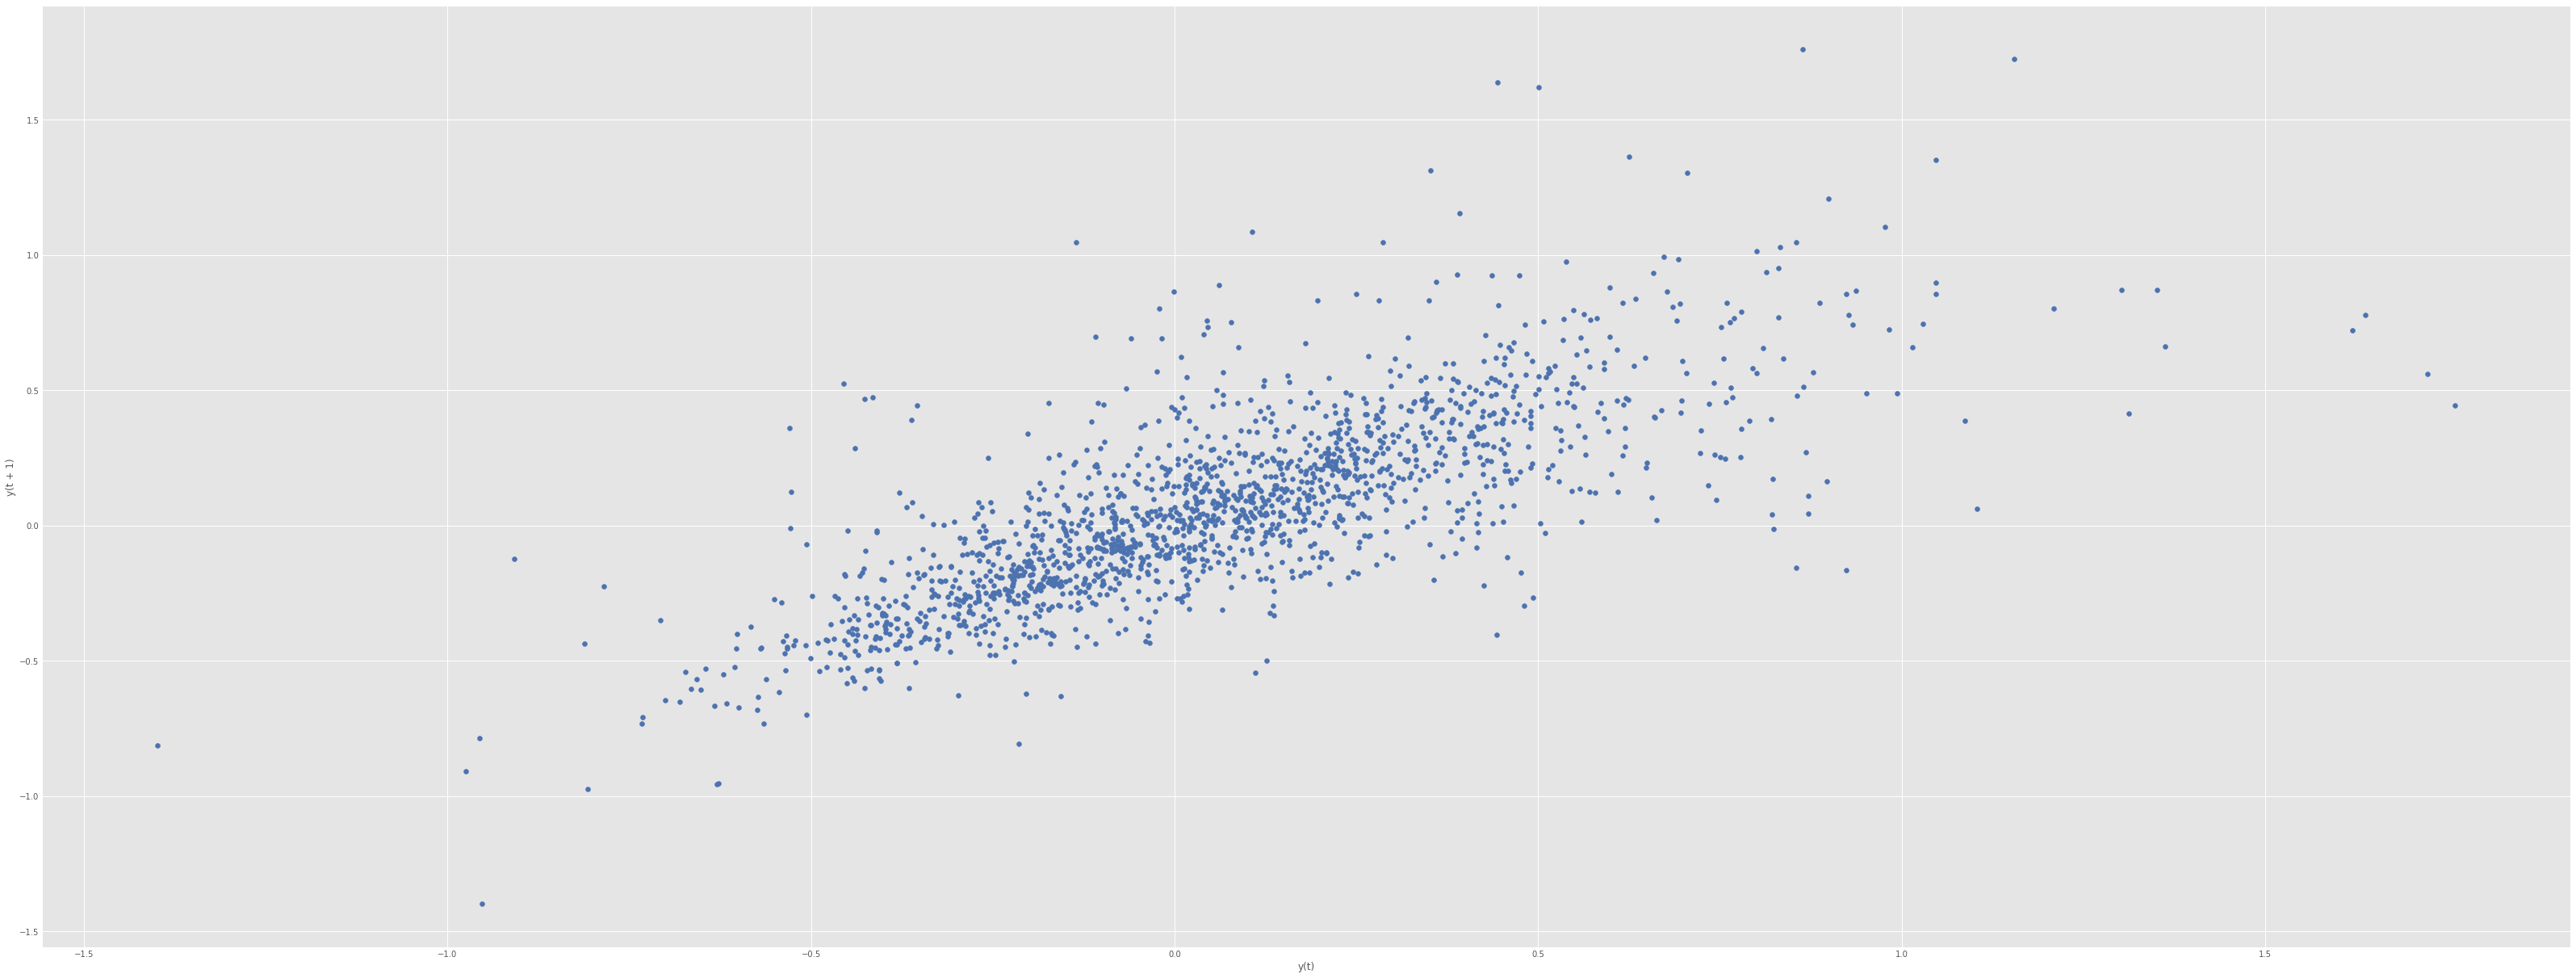

In [42]:
# Checking if the variable 'userAcceleration.x' depends on itself, using a lag_plot
plt.style.use('seaborn-deep')    
lag_plot(sensor['userAcceleration.x']);
print(plt.style.available)

Create a lag plot for `rotationRate.x`

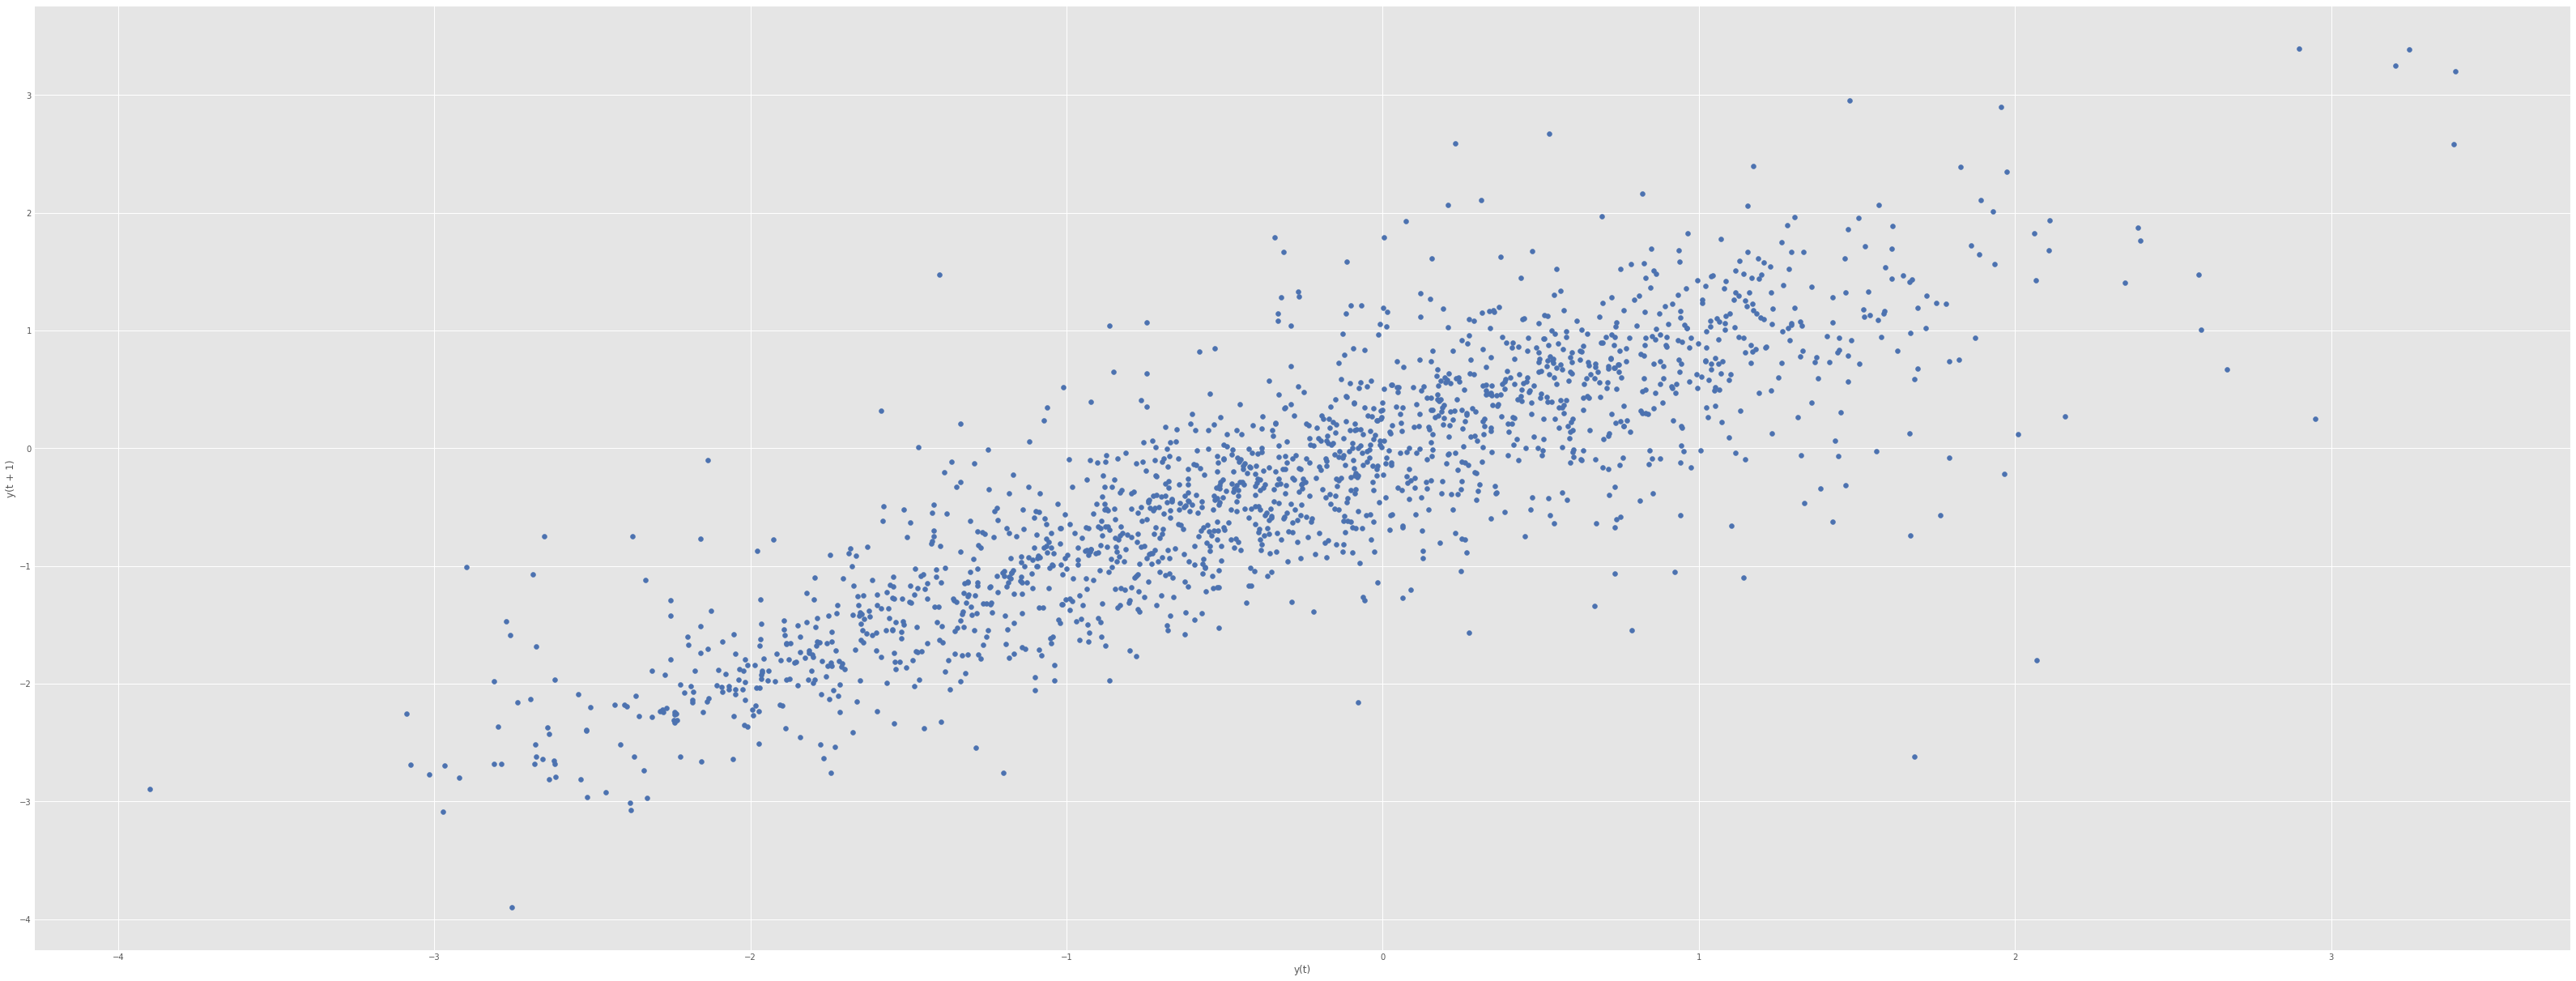

In [43]:
lag_plot(sensor['rotationRate.x']);

What are your conclusions from both visualizations?

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [44]:
# It will considered stationary if its mean and variance don't vary over time.
# Dickey-fuller test null hypothesis := data is not stationary.

ua_x, rr_x = adfuller(sensor['userAcceleration.x'])[1], adfuller(sensor['rotationRate.x'])[1]

print(f'P-value of userAcceleration.x:\t {ua_x}\nP-value of rotationRate.x:\t {rr_x}')

P-value of userAcceleration.x:	 2.823439483037483e-30
P-value of rotationRate.x:	 6.3202303359124956e-06


What are your conclusions from this test?

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [55]:
# ARMA := AutoRegressive Moving Average
#This function generates models that can have both an autoregressive component as well as a moving average component.

model=ARMA(sensor['userAcceleration.x'][:-10],order=(2,1)) #what does it mean the order?; #Using the last 10 observations
model_fit=model.fit(disp=False)
predictions = model_fit.predict(-10,-1);
predictions

c:\users\paola\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  % freq, ValueWarning)


2018-01-01 00:28:51   -0.107191
2018-01-01 00:28:52    0.190248
2018-01-01 00:28:53    0.121882
2018-01-01 00:28:54   -0.224629
2018-01-01 00:28:55    0.039701
2018-01-01 00:28:56   -0.145653
2018-01-01 00:28:57   -0.111255
2018-01-01 00:28:58    0.022745
2018-01-01 00:28:59    0.090587
2018-01-01 00:29:00    0.028644
Freq: S, dtype: float64

In [50]:
predictions_df = pd.DataFrame({'observed':sensor['userAcceleration.x'][:-10],'predicted':predictions,'diff':predictions-(sensor['userAcceleration.x'][:-10])})
predictions_df.tail(10)

,observed,predicted,diff
2018-01-01 00:28:51,0.059688,-0.107191,-0.166879
2018-01-01 00:28:52,0.131804,0.190248,0.058444
2018-01-01 00:28:53,-0.151525,0.121882,0.273407
2018-01-01 00:28:54,-0.071375,-0.224629,-0.153254
2018-01-01 00:28:55,-0.162607,0.039701,0.202308
2018-01-01 00:28:56,-0.191617,-0.145653,0.045964
2018-01-01 00:28:57,-0.081173,-0.111255,-0.030082
2018-01-01 00:28:58,0.033395,0.022745,-0.010650
2018-01-01 00:28:59,0.028120,0.090587,0.062467
2018-01-01 00:29:00,0.140211,0.028644,-0.111567


In [51]:
error = (predictions-sensor['userAcceleration.x'][:-10]).abs().sum()/len(sensor['userAcceleration.x'][:-10])
display(f"The error of this model is {error}")

'The error of this model is 0.000640449690723186'

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [56]:
# Root mean squared error
# For this kind of data, it seems this is a more reliable comparation than the last one. 
# RMSR is focused on the residuals of the standard deviation (prediction errors).

rmse(sensor['userAcceleration.x'][-10:],predictions)

0.18177172137381617